In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

/yunity/arusty/Graph-Manifold-Alignment/Python_Files/Helpers/Visualization_helpers.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/All_Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)


# Baseline Visualization

In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
197,CommunityCrime,turn,282,0.509294,0.509293
685,AirfoilSelfNoise,skewed,157,0.073448,0.244892
100,EnergyEfficiency,turn,2,0.908083,0.907704
127,EnergyEfficiency,distort,114,0.868213,0.865828
70,Hydrodynamics,skewed,2,-0.716774,0.983942


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

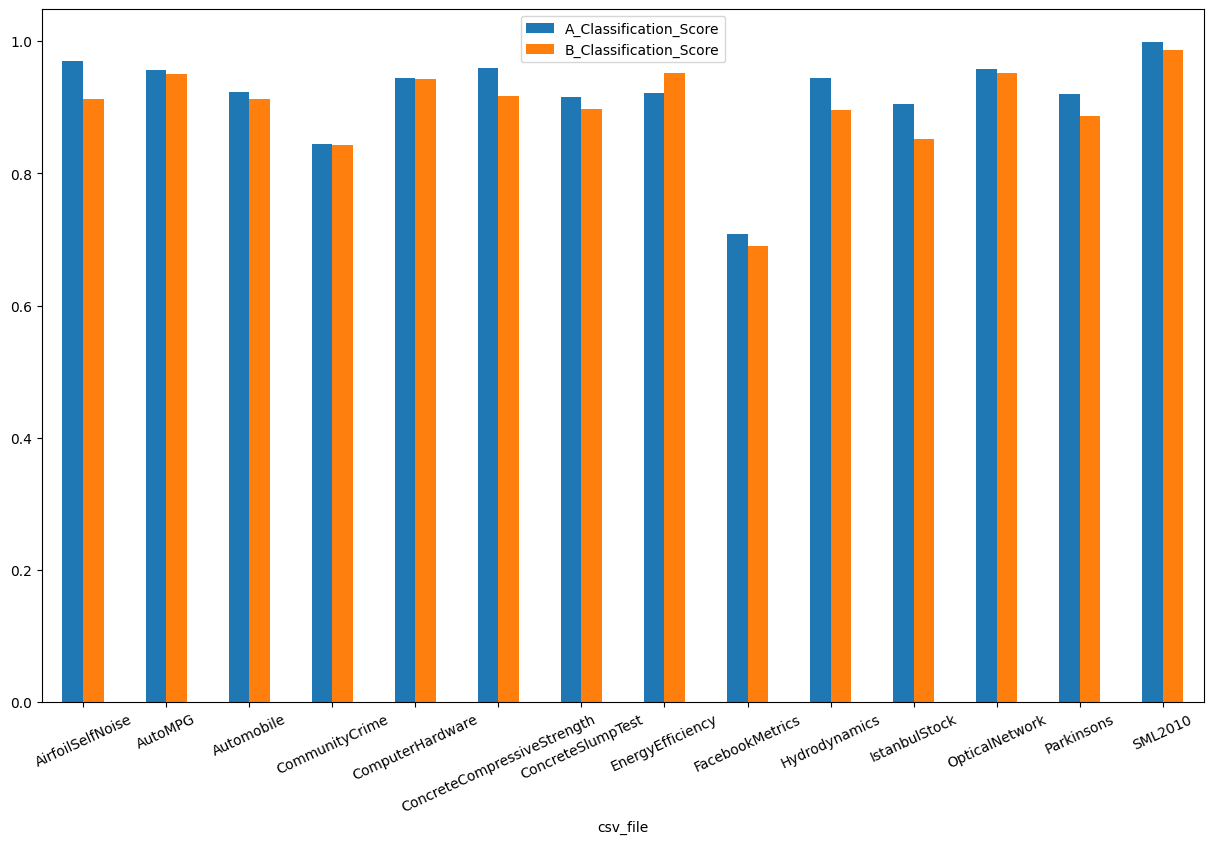

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
reg_df.sample(5)


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Parameter STD
16,MASH,Hydrodynamics,distort,0.3,"{'knn': 65, 'page_rank': 'off-diagonal', 'DTM'...","{'42': 0.6429294094517624, '1738': 0.653678524...","{'42': 0.011416343396862878, '1738': 0.0114163...","{'42': 0.700173149507487, '1738': 0.6701448081...","{'42': 0.5721610747210417, '1738': 0.598616460...","{'42': 0.20227954204399823, '1738': 0.39819429...","{'42': 0.7181291475548848, '1738': 0.844799615...","{'42': 0.5259171541447853, '1738': 0.689930488...","{'connection_limit': 0.0, 'threshold': 0.0, 'e..."
36,RF-MASH-,EnergyEfficiency,distort,0.3,"{'knn': 2, 'page_rank': 'full', 'DTM': 'log', ...","{'42': 0.9518093195758569, '1738': 0.939982437...","{'42': 0.02296362982855903, '1738': 0.02411651...","{'42': 0.9530335804425613, '1738': 0.945285322...","{'42': 0.9153851147848429, '1738': 0.951447731...","{'42': 0.8943271680725375, '1738': 0.902117960...","{'42': 0.32891971046663177, '1738': 0.31624155...","{'42': 0.2943280214452614, '1738': 0.222726654...","{'knn': 0.44397955407823475, 'page_rank': 0.02..."
3,SSMA,Hydrodynamics,skewed,0.3,"{'knn': 37, 'Uincluded': False, 'Dincluded': T...",{'42': 0.3284552813930305},{'42': 0.40751250000000006},{'42': 0.22941237822181626},{'42': 0.142937509503675},{'42': 0.11860327589049358},{'42': 1.0262456514649536},{'42': 1.011979833656603},{}
20,SPUD,Hydrodynamics,skewed,0.3,"{'knn': 23, 'OD_method': 'default', 'agg_metho...",{'42': -0.08185997016955926},{'42': 0.0479634002361275},{'42': 0.4061757701176282},{'42': 0.24139541099582085},{'42': 0.18934719961747026},{'42': 0.7239267639303419},{'42': 0.7003012831937093},"{'knn': 0.12518481868889256, 'OD_method': 0.05..."
34,JLMA,Hydrodynamics,random,0.3,"{'knn': 2, 'normalized_laplacian': True, 'd': ...","{'42': -0.3237856557499381, '1738': -0.1135529...","{'42': 0.5158068392646314, '1738': 0.519253879...","{'42': -0.49659967137632965, '1738': -0.270350...","{'42': -1.0738964747677446, '1738': -0.2385525...","{'42': -0.20007347611477844, '1738': -0.080624...","{'42': 0.8808077108448419, '1738': 1.132042871...","{'42': 1.157899125812811, '1738': 1.2119446236...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score
0,RF-SPUD,Hydrodynamics,random,0.3,-0.249903,0.227987,-0.162437,-0.278740,-0.099080,0.973908,1.044181,-0.477890,-0.002573,0.940687
35,RF-SPUD,Hydrodynamics,random,0.3,0.251670,0.000067,0.125448,-0.510535,-0.187817,1.012285,1.128905,0.251602,-0.002573,0.940687
16,MASH,Hydrodynamics,distort,0.3,0.648487,0.011416,0.656969,0.592738,0.383912,0.726808,0.593848,0.637071,0.944973,0.895982


In [8]:
plt_methods_by_CSV_max[row, col][row, col](df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

NameError: name 'row' is not defined

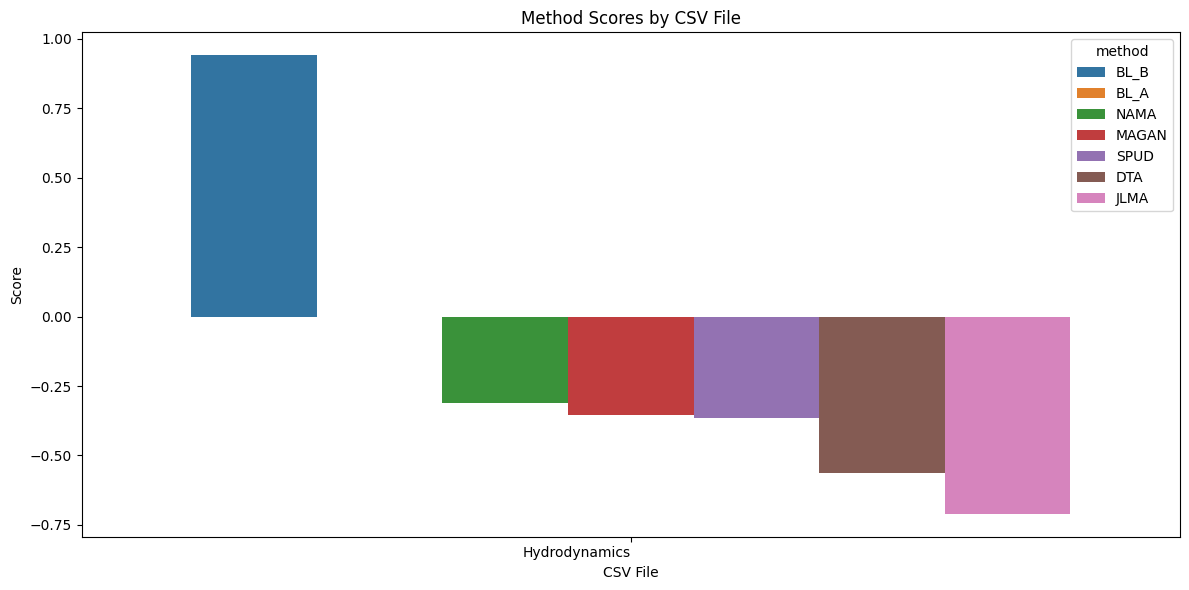

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = plt_methods_by_CSV_max(df = subset_df(proc_reg_df, split = "random"), return_df=True)

# Step 1: Melt the DataFrame into a long format
df_melted = pd.melt(df[['csv_file', "MASH", "NAMA", "SPUD", "MASH-", "BL_A", "BL_B",  "MAGAN", "JLMA", "DTA"]], id_vars='csv_file', var_name='method', value_name='score')

# Step 2: Drop rows with NaN values in the 'score' column
df_melted = df_melted.dropna(subset=['score'])

# Step 3: Sort by csv_file and score, with highest score first
df_sorted = df_melted.sort_values(['csv_file', 'score'], ascending=[True, False])

#Lets avoid negative values
df_sorted["score"] = df_sorted["score"] #+ 1

# Step 4: Plot using seaborn or matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='csv_file', y='score', hue='method', data=df_sorted)

# Step 5: Adjust the plot aesthetics
plt.title('Method Scores by CSV File')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('Score')
plt.xlabel('CSV File')
plt.tight_layout()

# Show the plot
plt.show()


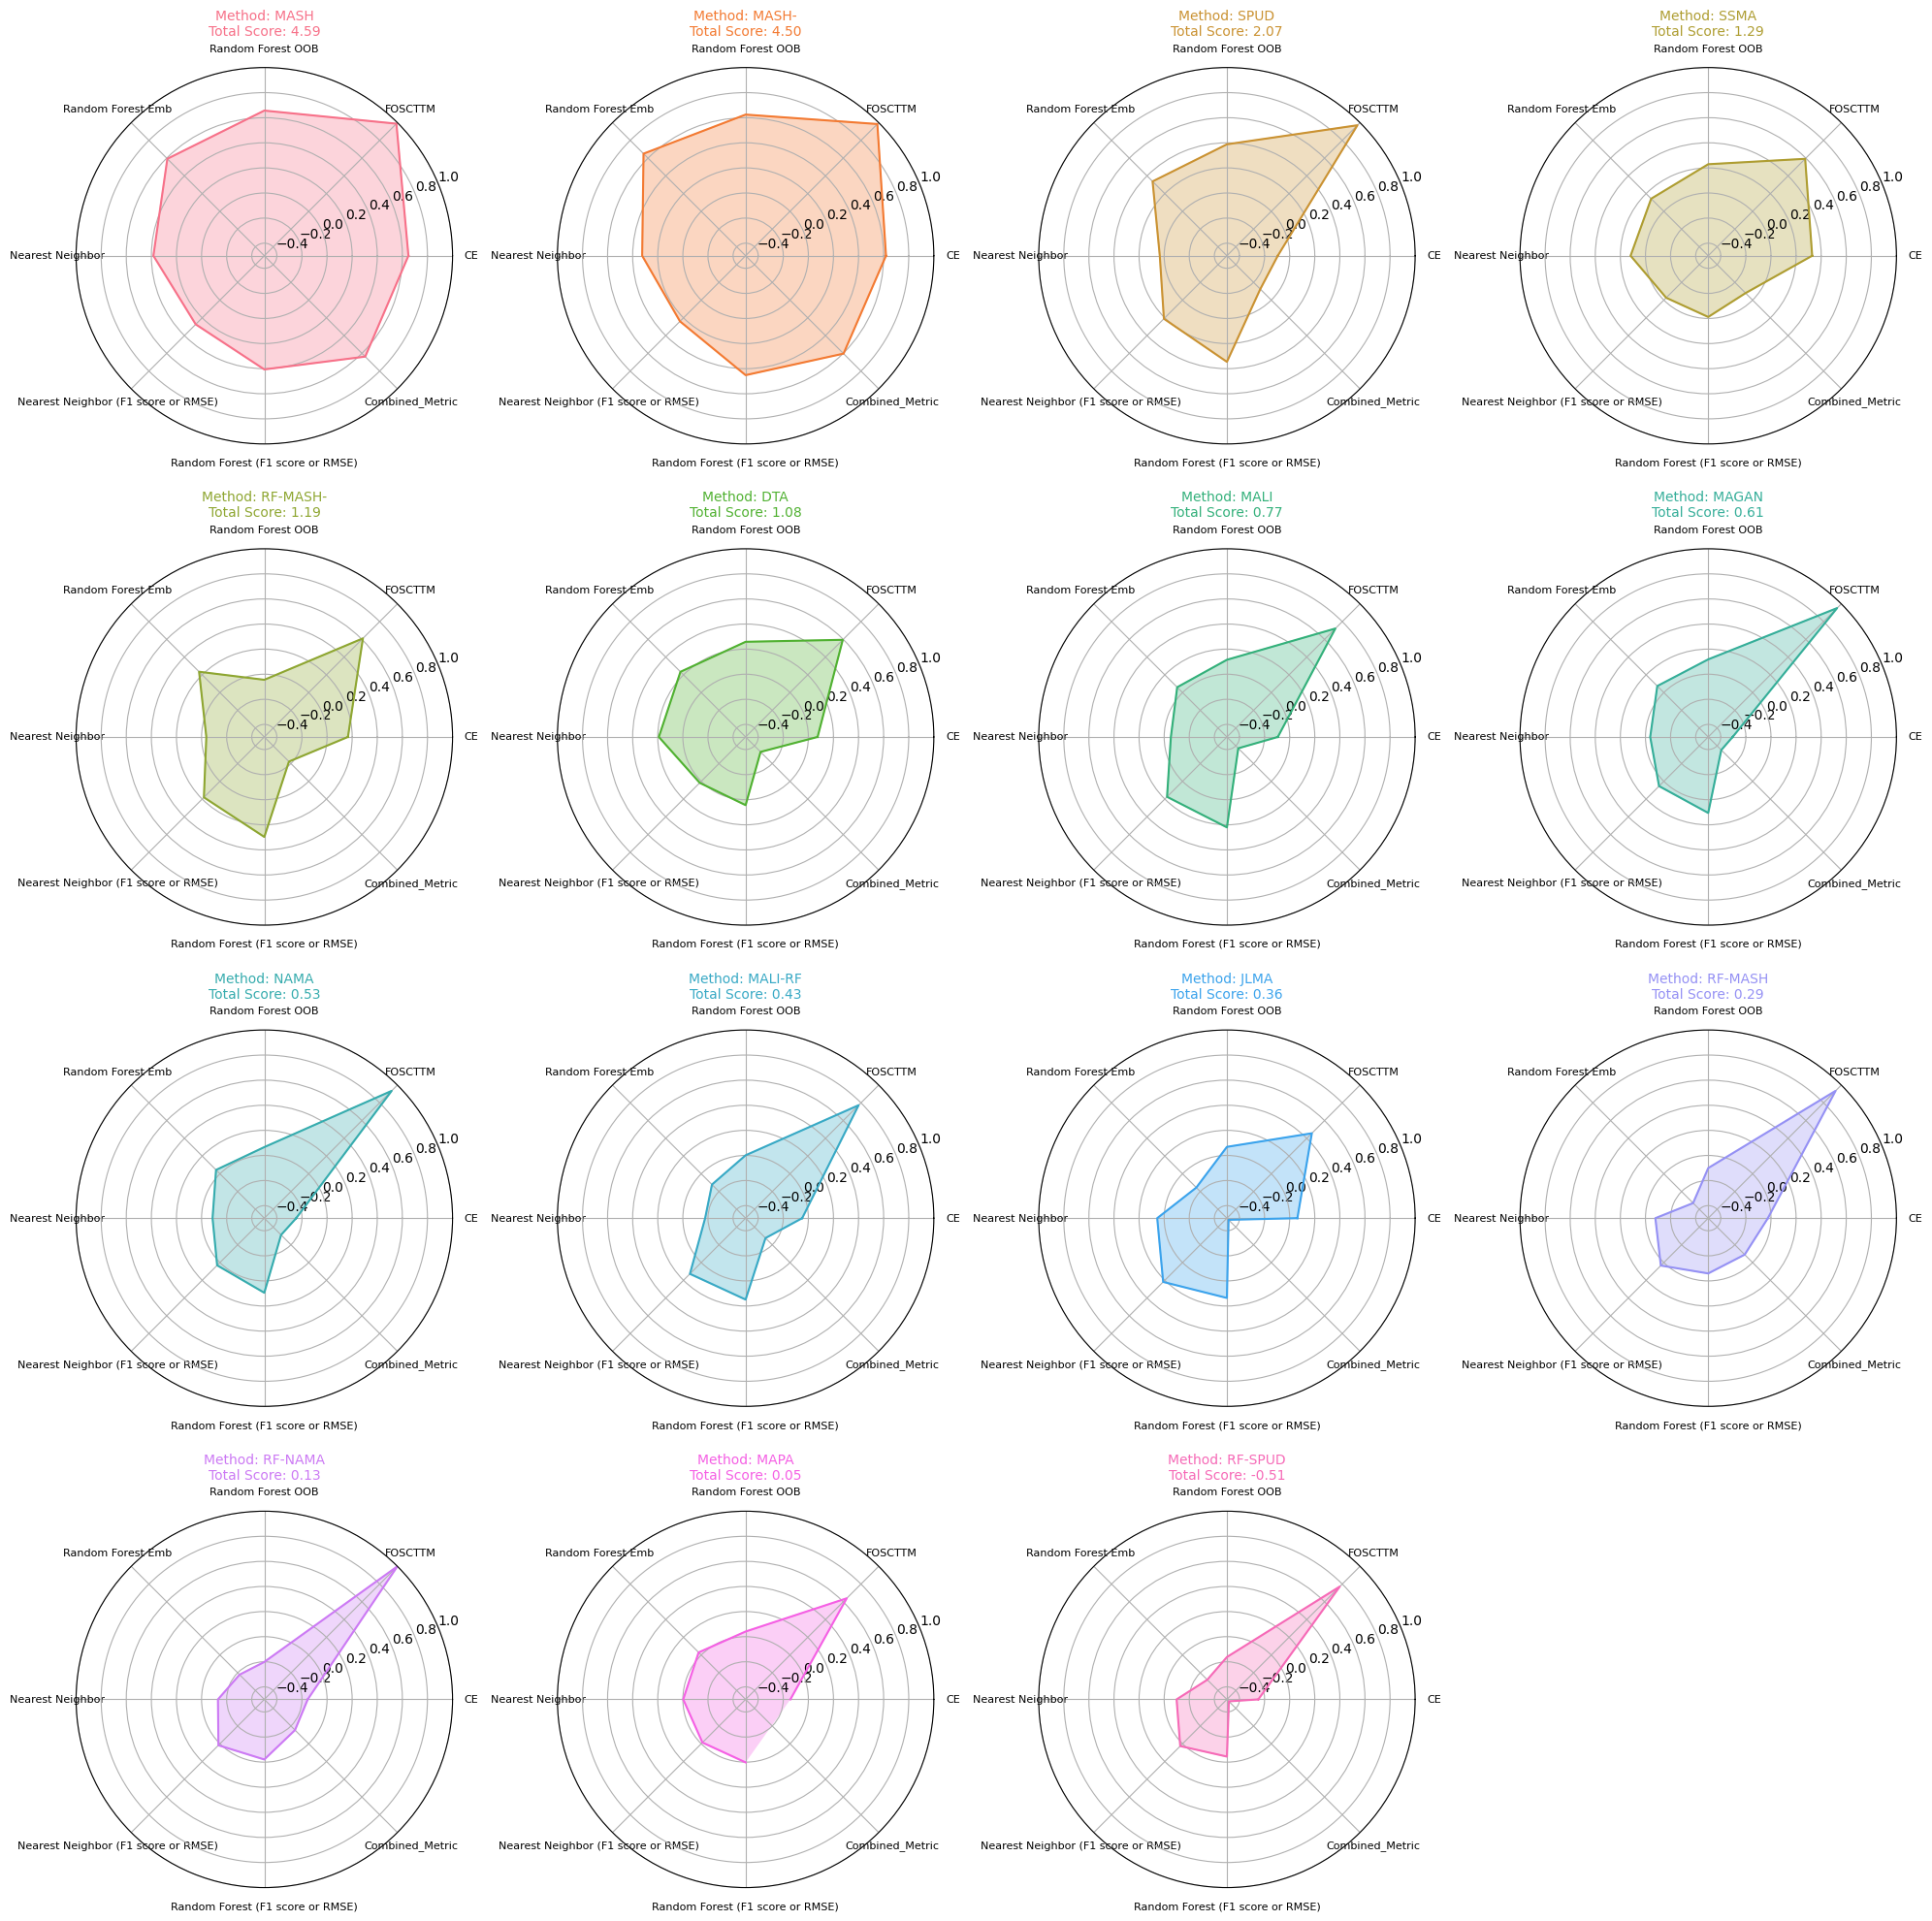

In [ ]:
# Assuming your DataFrame is `proc_reg_df`
unique_methods = proc_reg_df["method"].unique()

# Calculate the sum of scores for each method for sorting
method_scores = {}
for method_name in unique_methods:
    method_data = proc_reg_df[proc_reg_df["method"] == method_name].iloc[0, 4:-2]
    method_data["FOSCTTM"] = 1 - method_data["FOSCTTM"]
    method_data["Nearest Neighbor (F1 score or RMSE)"] = 1 - method_data["Nearest Neighbor (F1 score or RMSE)"]
    method_data["Random Forest (F1 score or RMSE)"] = 1 - method_data["Random Forest (F1 score or RMSE)"]
    score_sum = method_data.sum()
    method_scores[method_name] = score_sum

# Sort methods by total scores (descending order)
sorted_methods = sorted(method_scores.items(), key=lambda x: x[1], reverse=True)
sorted_method_names = [item[0] for item in sorted_methods]

# Define a color palette
colors = sns.color_palette("husl", n_colors=len(unique_methods))

# Calculate grid size
grid_size = int(len(unique_methods)**0.5) + 1

# Create polar subplots
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(20, 20), subplot_kw=dict(polar=True))
axes = axes.flatten()

# Loop through each sorted method
for i, (method_name, color) in enumerate(zip(sorted_method_names, colors)):
    # Select the data for the current method
    method_data = proc_reg_df[proc_reg_df["method"] == method_name].iloc[0, 4:-2]
    method_data["FOSCTTM"] = 1 - method_data["FOSCTTM"]
    method_data["Nearest Neighbor (F1 score or RMSE)"] = 1 - method_data["Nearest Neighbor (F1 score or RMSE)"]
    method_data["Random Forest (F1 score or RMSE)"] = 1 - method_data["Random Forest (F1 score or RMSE)"]

    # Prepare radar chart data
    categories = list(method_data.index)
    values = method_data.values.flatten().tolist()
    values += values[:1]  # Close the radar chart loop

    # Compute angles for radar chart
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]

    # Plot on the appropriate subplot with the color
    ax = axes[i]
    ax.plot(angles, values, label=method_name, color=color)
    ax.fill(angles, values, color=color, alpha=0.3) 
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_ylim(-0.5, 1)  
    ax.set_title(f"Method: {method_name}\nTotal Score: {method_scores[method_name]:.2f}", 
                 fontsize=10, color=color)  

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display
plt.tight_layout()
plt.show()


# Veiw Feature variance

In [ ]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Parameter STD,Combined_Metric
25,RF-SPUD,Hydrodynamics,skewed,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",-0.007624,0.000032,{'42': 0.15032579504462762},{'42': -0.6910546563678623},{'42': -0.20272898607088985},{'42': 0.8817816933536555},{'42': 1.0455769767428453},{},-0.007656
26,DTA,Hydrodynamics,random,0.3,"{'knn': 37, 'distances': 'Not_DPT'}",-0.234365,0.327349,"{'42': 0.14138527682248558, '1738': 0.16869232...","{'42': 0.12098953998845197, '1738': 0.09900444...","{'42': 0.021221938511187588, '1738': 0.0618657...","{'42': 1.0814531926344717, '1738': 0.908874916...","{'42': 1.024855498286929, '1738': 0.8907030845...",{},-0.561714


### Spud Parameters on STD

In [ ]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.126777,0.044320,0.150517
1,0.164238,0.070185,0.164293
2,0.163016,0.201067,0.020305
3,0.125185,0.057855,0.059305
4,0.187728,0.093017,0.121048
5,0.107144,0.104199,0.059967


<Axes: >

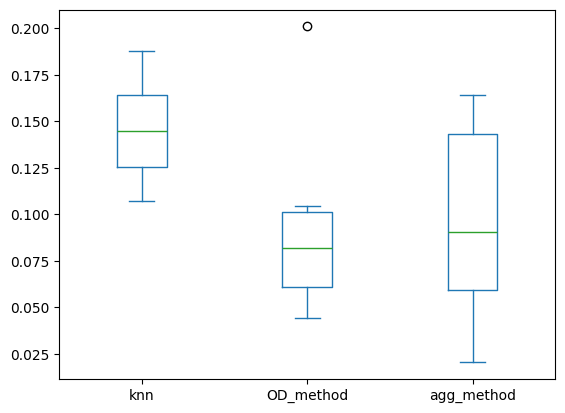

In [ ]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [ ]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.241471,0.006065,0.067738,0.0


<Axes: >

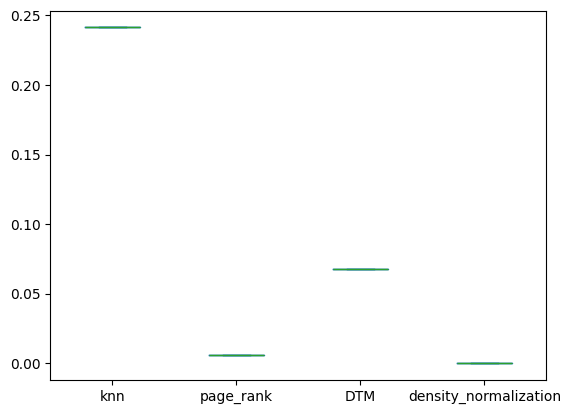

In [ ]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [ ]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.0,0.0,0.0


<Axes: >

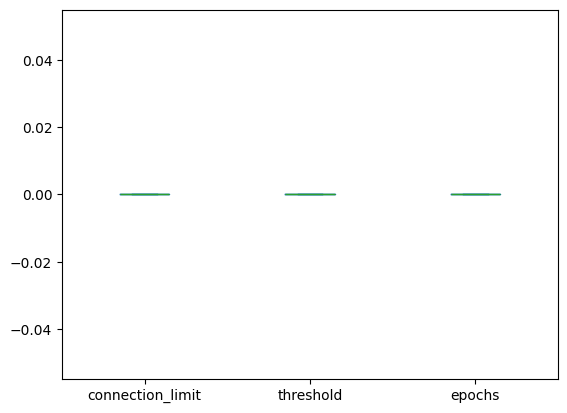

In [ ]:
mash_param_df.plot(kind = "box") 